In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

x = df.iloc[: , :-1]
print(x)
y = df.iloc[: , -1]
print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split (x,y , test_size = 0.25 , random_state = 42)

In [9]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [15]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [18]:
#predicting random values
model.predict(sc.transform([[30 , 80000]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [25]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
cm

array([[61,  2],
       [12, 25]])

In [26]:
accuracy_score(y_test , y_pred)

0.86

Just clone and fix this if you can please thanks !


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-32-e2304a7ae017>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0] , x_set[y_set == j , 1] , c = ListedColormap(('red' , 'green'))(i) , label = j)


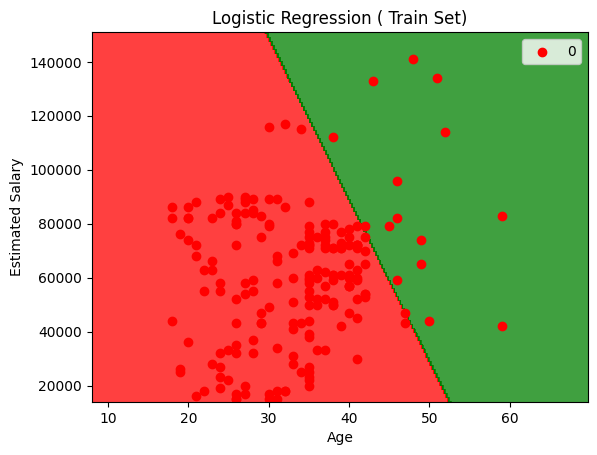

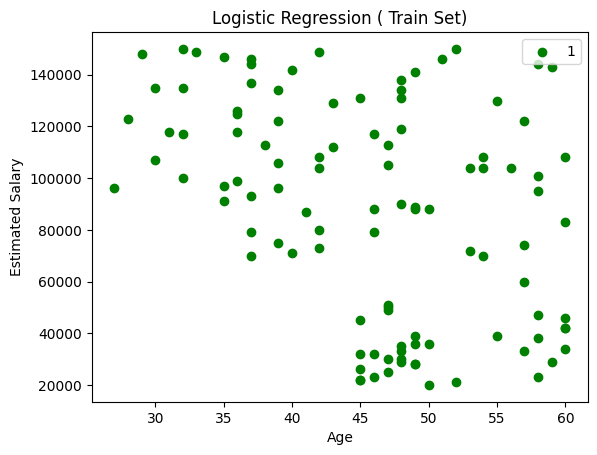

In [32]:
# visualise results :
#train set
from matplotlib.colors import ListedColormap

x_set , y_set = sc.inverse_transform(x_train) , y_train

x1 , x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10 , stop = x_set[: , 0].max() + 10 , step=0.25) ,
                      np.arange(start = x_set[:, 1].min() - 1000 , stop = x_set[:, 1].max() + 1000 , step = 0.25))


plt.contourf(x1 , x2 , model.predict(sc.transform(np.array([x1.ravel() , x2.ravel()]).T)).reshape(x1.shape) ,
             alpha = 0.75 , cmap = ListedColormap (('red' , 'green')))

plt.xlim(x1.min() , x1.max())
plt.ylim(x2.min() , x2.max())

for i , j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0] , x_set[y_set == j , 1] , c = ListedColormap(('red' , 'green'))(i) , label = j)

  plt.title('Logistic Regression ( Train Set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.legend()
  plt.show()